# Data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
#Data from SP500
def loadData():
    data_url = 'https://raw.githubusercontent.com/mtomas-classes/OMI446/master/TD6/SPX.csv'
    data = pd.read_csv(data_url)  #utiliser ceux deux lignes pour telecharger directement
    data.index = pd.to_datetime(data["Date"])
    return data
data = loadData()
data.head(5)

Date   High    Low   Open  Close   Volume  Adj Close
Date                                                                  
1950-01-03  1950-01-03  16.66  16.66  16.66  16.66  1260000      16.66
1950-01-04  1950-01-04  16.85  16.85  16.85  16.85  1890000      16.85
1950-01-05  1950-01-05  16.93  16.93  16.93  16.93  2550000      16.93
1950-01-06  1950-01-06  16.98  16.98  16.98  16.98  2010000      16.98
1950-01-09  1950-01-09  17.08  17.08  17.08  17.08  2520000      17.08

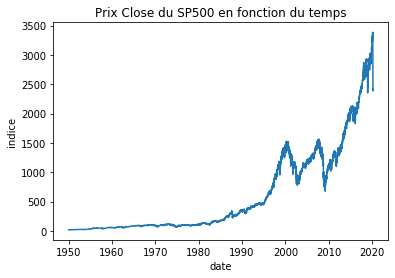

In [107]:
plt.clf()
plt.plot(data.Close[data.index])
plt.title("Prix Close du SP500 en fonction du temps")
plt.xlabel("date")
plt.ylabel("indice")
plt.show()

# Create Indicators
Les deux indicateurs sont des moyennes mobiles.

In [108]:
#Moving averages

data = loadData()
data['SMA_1'] = data['Close'].rolling(5).mean()
data['SMA_2'] = data['Close'].rolling(20).mean()

#Deleting NAN values
data = data.dropna()
print("Data length : ", len(data))
data.head()

Data length :  17648


Date       High        Low       Open      Close   Volume  \
Date                                                                          
1950-01-30  1950-01-30  17.020000  17.020000  17.020000  17.020000  1640000   
1950-01-31  1950-01-31  17.049999  17.049999  17.049999  17.049999  1690000   
1950-02-01  1950-02-01  17.049999  17.049999  17.049999  17.049999  1810000   
1950-02-02  1950-02-02  17.230000  17.230000  17.230000  17.230000  2040000   
1950-02-03  1950-02-03  17.290001  17.290001  17.290001  17.290001  2210000   

            Adj Close   SMA_1    SMA_2  
Date                                    
1950-01-30  17.020000  16.834  16.8670  
1950-01-31  17.049999  16.872  16.8865  
1950-02-01  17.049999  16.934  16.8965  
1950-02-02  17.230000  17.034  16.9115  
1950-02-03  17.290001  17.128  16.9270

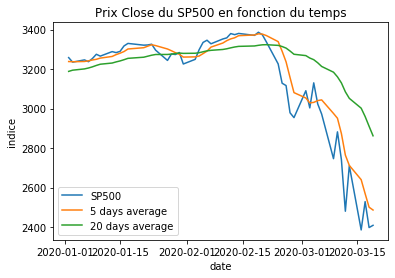

In [101]:
plt.clf()
date = "2020-01-01"
plt.plot(data.Close[data.index >= date],label="SP500")
plt.plot(data.SMA_1[data.index >= date],label="5 days average")
plt.plot(data.SMA_2[data.index >= date],label= "20 days average")
plt.title("Prix Close du SP500 en fonction du temps")
plt.xlabel("date")
plt.ylabel("indice")
plt.legend()
plt.show()

# Create Strategy
On compare 2 strategies:

    -Une naïve où l'on achète et vend tous les jours quoiqu'il arrive.
    
    -Une où l'on achète uniquement si la moyenne à 5 jours et superieur à celle de 20 jours

In [139]:
#Basic strategy
#These function decide wteher or not to buy for a day (buy the morning and sell the evening)

#When SMA_1 crosses SMA_2 buy!
def cross_over(data,date):
    """" Retrun True to buy and False otherwise
    data : dataframe with price and indicators
    date : date to make the decision """
    return (data["SMA_1"][data.index == date] > data["SMA_2"][data.index == date]).all()

#print(sum((data["SMA_1"] > data["SMA_2"])/len(data["SMA_2"])))

# Allways buy strategy
def all_buy(data,date):
    """" Retrun True to buy and False otherwise
    data : dataframe with price and indicators
    date : date to make the decision """
    return True


# Test Strategy

In [137]:
# Simulate the strategy
money = 100000 #Starting funds
START = "2000-01-01" #starting date

def simulate(money,decision):
    """ Simulate the following process every day:
    - morning : check if the decision say to buy or not
        - buy and sell the evening if decision say to buy
        - don't do anything if decision say not to buy    
        
    """
    
    
    hist = [money]
    li = data.index[data.index > START]

    for date in li:
        if decision(data,date):
            hist.append(((data['Close'][data.index==date]-data['Open'][data.index==date])*(hist[-1]//data['Open'][data.index==date]))[date]+hist[-1])
            # money(day+1) = money(day)+(closing_price-opening_price*number_of_action_you_can_buy)
        else:
            hist.append(hist[-1])
    return pd.DataFrame(hist[1:],index=li,columns=['Hist'])


#Simulate the 2 strategies
sim_sma = simulate(money,cross_over)
sim_all = simulate(money,all_buy)

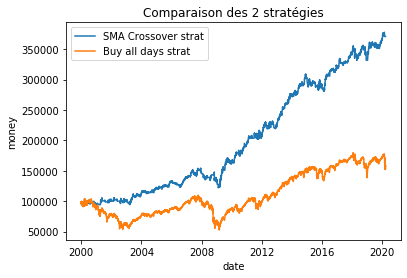

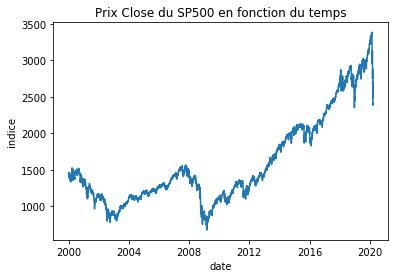

In [140]:
plt.figure()
plt.plot(sim_sma,label="SMA Crossover strat")
plt.plot(sim_all,label="Buy all days strat")
plt.title("Comparaison des 2 stratégies")
plt.xlabel("date")
plt.ylabel("money")
plt.legend()
plt.show()

plt.plot(data["Close"][data.index > START])
plt.title("Prix Close du SP500 en fonction du temps")
plt.xlabel("date")
plt.ylabel("indice")
plt.show()

# Strategy analysis

In [141]:
#Basic stats
def analyse(hist):
    
    print('End with : ', int(hist.tail(1)['Hist'][0]))
    print('Average : ', int(hist.mean()['Hist']))
    print('Variance : ', int(hist.var()['Hist']))

print('SMA')
analyse(sim_sma)

print('ALL')
analyse(sim_all)

SMA
End with :  370841
Average :  201132
Variance :  8274731457
ALL
End with :  157524
Average :  110572
Variance :  1245777373


Le résultat semble un peu trop bon pour être vrai ...

# Remarques

Bien décomposer le problème.

Objectif: Algorithme de décision suivant : acheter le matin et vendre le soir

Etapes : Avoir données, quelles données ?

       Ajouter des indicateurs à ces données (exterieurs, moyennes mobiles, ...)
       
       
       Créer un programme de décision qui choisit ou non d'acheter
       
       
       Tester  ce programme de décision (Etudier ses performances)
       
       